#### 공공데이터를 활용한 서울시 지하철역 승객 분포 분석 <hr>

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [108]:
file = '../DATA/서울시 지하철호선별 역별 승하차 인원 정보.csv'

In [110]:
userDF = pd.read_csv(file)
userDF.head()

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20240213,우이신설선,4.19민주묘지,2894,2715,20240216
1,20240213,경원선,가능,6538,6281,20240216
2,20240213,3호선,가락시장,9214,8998,20240216
3,20240213,8호선,가락시장,7981,8822,20240216
4,20240213,7호선,가산디지털단지,49244,49397,20240216


In [114]:
userDF.shape

(23929, 6)

In [112]:
userDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23929 entries, 0 to 23928
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    23929 non-null  int64 
 1   호선명     23929 non-null  object
 2   역명      23929 non-null  object
 3   승차총승객수  23929 non-null  int64 
 4   하차총승객수  23929 non-null  int64 
 5   등록일자    23929 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [115]:
userDF['사용일자'].nunique()

39

In [120]:
userDF['사용일자'].unique()

array([20240213, 20240212, 20240211, 20240210, 20240209, 20240208,
       20240207, 20240206, 20240205, 20240204, 20240203, 20240202,
       20240201, 20240131, 20240130, 20240129, 20240128, 20240127,
       20240126, 20240125, 20240124, 20240123, 20240122, 20240121,
       20240120, 20240119, 20240118, 20240117, 20240116, 20240115,
       20240114, 20240113, 20240112, 20240111, 20240110, 20240109,
       20240108, 20240107, 20240106], dtype=int64)

In [125]:
userDF['역명'].nunique()

530

In [127]:
userDF['역명'].unique()

array(['4.19민주묘지', '가능', '가락시장', '가산디지털단지', '가양', '가오리', '가좌', '가천대',
       '가평', '간석', '갈매', '강남', '강남구청', '강동', '강동구청', '강매', '강변(동서울터미널)',
       '강일', '강촌', '개롱', '개봉', '개포동', '개화', '개화산', '거여', '건대입구', '검암',
       '경기광주', '경마공원', '경복궁(정부서울청사)', '경찰병원', '계양', '고덕', '고려대(종암)', '고색',
       '고속터미널', '고잔', '곡산', '곤지암', '공덕', '공릉(서울과학기술대)', '공항시장', '공항화물청사',
       '과천', '관악', '관악산(서울대)', '광나루(장신대)', '광명', '광명사거리', '광운대',
       '광화문(세종문화회관)', '광흥창(서강)', '교대(법원.검찰청)', '구로', '구로디지털단지', '구룡',
       '구리', '구반포', '구산', '구성', '구의(광진구청)', '구일', '구파발', '국수', '국회의사당',
       '군자(능동)', '군포', '굴봉산', '굽은다리(강동구민회관앞)', '금곡', '금릉', '금정', '금천구청',
       '금촌', '금호', '기흥', '길동', '길음', '김유정', '김포공항', '까치산', '까치울',
       '낙성대(강감찬)', '남구로', '남동인더스파크', '남부터미널(예술의전당)', '남성', '남영', '남위례',
       '남춘천', '남태령', '남한산성입구(성남법원.검찰청)', '내방', '노들', '노량진', '노원', '녹번',
       '녹사평(용산구청)', '녹양', '녹천', '논현', '능곡', '단대오거리', '달월', '답십리', '당고개',
       '당곡', '당산', '당정', '대곡', '대공원', '대림(구로구청)', '대모산입구', '대방', '대성리',
  

In [139]:
usedate_station = userDF.groupby(['사용일자', '역명'])

In [155]:
usedate_station.sum()

호선명  승차총승객수  하차총승객수      등록일자
사용일자     역명                                         
20240106 4.19민주묘지    우이신설선    2419    2063  20240109
         가능            경원선    5271    5034  20240109
         가락시장       3호선8호선   13589   13756  40480218
         가산디지털단지    7호선경부선   21009   21287  40480218
         가양            9호선   14950   14358  20240109
...                    ...     ...     ...       ...
20240213 회기            중앙선   22962   23535  20240216
         회룡            경원선   13394   12950  20240216
         회현(남대문시장)     4호선   25140   26277  20240216
         효창공원앞      경의선6호선   10595   10334  40480432
         흑석(중앙대입구)     9호선    8601    9077  20240216

[20516 rows x 4 columns]

In [157]:
usedate_station.sum().loc[(20240213, '서울역'),('승차총승객수', '하차총승객수')]

승차총승객수    100539
하차총승객수     85269
Name: (20240213, 서울역), dtype: int64

In [158]:
usedate_station.sum().loc[(20240213, '서울역'),('승차총승객수', '하차총승객수')].sum()

185808

In [159]:
def total_passenger(ymd, station):
    df = usedate_station.sum()
    return df.loc[(ymd, station),('승차총승객수', '하차총승객수')].sum()

total_passenger(20240213, '상봉(시외버스터미널)')

KeyError: (20240213, '상봉(시외버스터미널)')

In [149]:
x = 192058
len(str(x))
m = x//10**(len(str(x)) - 1)
(m+1)*10**(len(str(x)) - 1)

200000

1. 각 지하철 역별 이용객수의 평균 : 26966명
2. 각 지하철 역별 이용객수의 표준편차 : 28458
3. 이용객 수가 가장 많은 역의 이름 : 잠실(송파구청)
4. 이용객 수가 가장 적은 역의 이름 : 까치울
5. 가장 많은 이용객이 있는 역의 이용객 수 : 191610명
6. 가장 적은 이용객이 있는 역의 이용객 수 : 1명


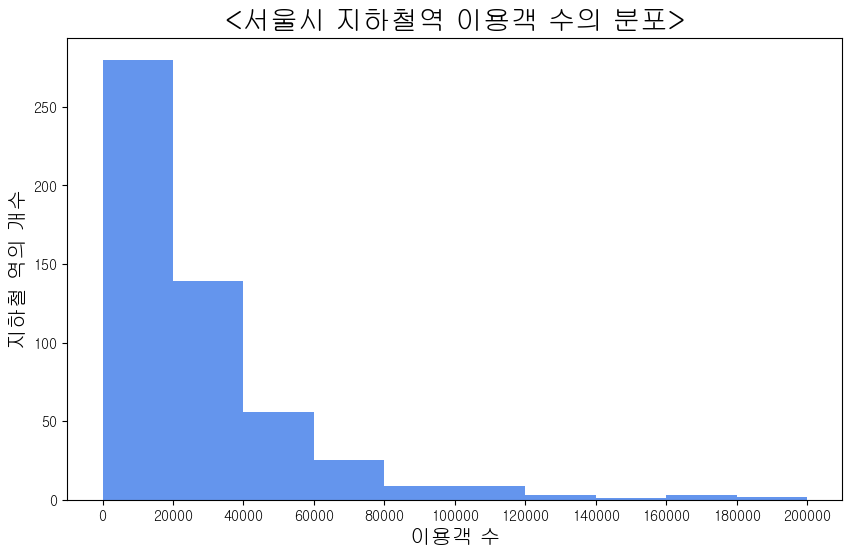

In [160]:
def total_passenger(ymd, station):
    df = usedate_station.sum()
    return df.loc[(ymd, station),('승차총승객수', '하차총승객수')].sum()

number_list = []
def main(ymd):
    use_dateDF = userDF.groupby('사용일자').get_group(ymd)
    for station in use_dateDF['역명'].unique():
        number_list.append(total_passenger(ymd, station))
    index = use_dateDF['역명'].unique()
    data = number_list
    number_series = pd.Series(index = index, data = data)
    print(f'1. 각 지하철 역별 이용객수의 평균 : {round(number_series.mean())}명')
    print(f'2. 각 지하철 역별 이용객수의 표준편차 : {round(number_series.std())}')
    print(f'3. 이용객 수가 가장 많은 역의 이름 : {number_series.idxmax()}')
    print(f'4. 이용객 수가 가장 적은 역의 이름 : {number_series.idxmin()}')
    print(f'5. 가장 많은 이용객이 있는 역의 이용객 수 : {number_series[number_series.idxmax()]}명')
    print(f'6. 가장 적은 이용객이 있는 역의 이용객 수 : {number_series[number_series.idxmin()]}명')

    x = number_series[number_series.idxmax()]
    le = x//10**(len(str(x)) - 1)  # x의 최고 자리수
    upper = (le+1)*10**(len(str(x)) - 1)

    plt.figure(figsize = (10, 6))
    plt.hist(number_list, bins = 10, range = (0, upper), color = 'cornflowerblue')
    plt.title('<서울시 지하철역 이용객 수의 분포>', size = 20)
    plt.xlabel('이용객 수', size = 15)
    plt.xticks(np.linspace(0, upper, 11))
    plt.ylabel('지하철 역의 개수', size = 15)
    plt.show()
    
main(20240213)
    

#### 공공데이터가 아닌 데이터로 서울시 지하철역 승객 분포 분석<hr>

In [57]:
file2 = '../DATA/subwaytime.csv'

In [66]:
# 12월 23일 데이터
passengerDF = pd.read_csv(file2)
passengerDF.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,Dec.23,1호선,150.0,서울역,700,35,7812,8436,12190,50415,...,29690,15733,3170,4088,140,1884,0,283,0,0
2,Dec.23,1호선,151.0,시청,73,1,2208,4356,3731,21903,...,14481,5965,4290,1523,1053,383,0,10,0,0
3,Dec.23,1호선,152.0,종각,167,1,4280,4932,4329,25201,...,38020,5317,2621,1402,1638,241,1,1,0,0
4,Dec.23,1호선,153.0,종로3가,230,16,4174,2538,3621,11378,...,20706,7655,7239,2844,917,422,0,1,0,0


In [113]:
passengerDF.shape

(621, 52)

In [111]:
passengerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 1 to 621
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                621 non-null    object 
 1   호선명                621 non-null    object 
 2   역ID                621 non-null    float64
 3   지하철역               621 non-null    object 
 4   04:00:00~04:59:59  621 non-null    object 
 5   Unnamed: 5         621 non-null    object 
 6   05:00:00~05:59:59  621 non-null    object 
 7   Unnamed: 7         621 non-null    object 
 8   06:00:00~06:59:59  621 non-null    object 
 9   Unnamed: 9         621 non-null    object 
 10  07:00:00~07:59:59  621 non-null    object 
 11  Unnamed: 11        621 non-null    object 
 12  08:00:00~08:59:59  621 non-null    object 
 13  Unnamed: 13        621 non-null    object 
 14  09:00:00~09:59:59  621 non-null    object 
 15  Unnamed: 15        621 non-null    object 
 16  10:00:00~10:59:59  621 non

In [67]:
# 필요없는 행 삭제
passengerDF = passengerDF.drop(0)

In [68]:
stations = passengerDF.groupby('지하철역')

In [161]:
stations.sum()

,사용월,호선명,역ID,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
지하철역,,,,,,,,,,,,,,,,,,,,,
4.19민주묘지,Dec.23,우이신설선,4703.0,2,0,1487,328,2963,974,7907,...,637,2850,133,719,2,6,0,4,0,0
가능,Dec.23,경원선,1907.0,330,6,7383,1437,10933,3721,22155,...,1257,5359,153,2354,0,0,0,0,0,0
가락시장,Dec.23Dec.23,3호선8호선,3158.0,45 136,2 3,2869 3384,577 2465,6593 5226,5903 7091,19405 10382,...,3242 5927,6369 4986,424 1224,2085 2684,15 8,169 625,0 0,12 68,0 0,0 0
가산디지털단지,Dec.23Dec.23,경부선7호선,4450.0,1440 662,5 4,7148 7281,2806 5343,6674 9578,12244 28039,13642 22388,...,6592 12594,6785 8860,252 1657,1161 3193,0 2,0 27,0 0,0 0,0 0,0 0
가양,Dec.23,9호선,4107.0,43,0,14846,1708,26288,7988,72995,...,4794,21943,619,6693,9,376,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
회기,Dec.23,중앙선,1015.0,964,10,10699,3928,19393,13189,51772,...,13310,29919,671,5716,2,550,0,0,0,0
회룡,Dec.23,경원선,1905.0,1337,12,14174,2090,26441,5160,53942,...,1770,12665,335,5308,0,0,0,0,0,0
회현(남대문시장),Dec.23,4호선,425.0,27,0,1264,687,3067,19048,5003,...,5819,3646,857,1208,69,157,0,4,0,0


In [69]:
stations.size()

지하철역
4.19민주묘지     1
가능           1
가락시장         2
가산디지털단지      2
가양           1
            ..
회기           1
회룡           1
회현(남대문시장)    1
효창공원앞        2
흑석(중앙대입구)    1
Length: 529, dtype: int64

In [70]:
stations.get_group('서울역')

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
1,Dec.23,1호선,150.0,서울역,700,35,7812,8436,12190,50415,...,29690,15733,3170,4088,140,1884,0,283,0,0
112,Dec.23,4호선,426.0,서울역,226,5,4245,756,5852,14141,...,5528,10299,698,3347,34,423,0,62,0,0
121,Dec.23,경부선,1001.0,서울역,4,4,54,583,119,4224,...,8060,843,1081,56,0,2,0,0,0,0
331,Dec.23,경의선,1291.0,서울역,3,1,631,17,1093,7775,...,2752,957,3,151,0,0,0,0,0,0
571,Dec.23,공항철도 1호선,4201.0,서울역,232,3,2995,1751,3773,13703,...,11398,5166,112,3423,0,1,0,0,0,0


In [63]:
stations.get_group('서울역').set_index(['사용월', '호선명', '역ID', '지하철역'])

04:00:00~04:59:59 Unnamed: 5 05:00:00~05:59:59  \
사용월    호선명      역ID    지하철역                                                  
Dec.23 1호선      150.0  서울역               700         35              7812    
       4호선      426.0  서울역               226          5              4245    
       경부선      1001.0 서울역                 4          4                54    
       경의선      1291.0 서울역                 3          1               631    
       공항철도 1호선 4201.0 서울역               232          3              2995    

                            Unnamed: 7 06:00:00~06:59:59 Unnamed: 9  \
사용월    호선명      역ID    지하철역                                           
Dec.23 1호선      150.0  서울역       8436             12190      50415    
       4호선      426.0  서울역        756              5852      14141    
       경부선      1001.0 서울역        583               119       4224    
       경의선      1291.0 서울역         17              1093       7775    
       공항철도 1호선 4201.0 서울역       1751              3773      13703    

                            07:00:00~07:59:59 Unnamed: 11 08:00:00~08:59:59  \
사용월    호선명      역ID    지하철역                                                   
Dec.23 1호선      150.0  서울역             37075      105313             68020    
       4호선      426.0  서울역             11378       36363             15296    
       경부선      1001.0 서울역             10155        6483             21075    
       경의선      1291.0 서울역              2758       23575              2931    
       공항철도 1호선 4201.0 서울역             11050       20584             15142    

                            Unnamed: 13  ... 23:00:00~23:59:59 Unnamed: 43  \
사용월    호선명      역ID    지하철역              ...                                 
Dec.23 1호선      150.0  서울역      218007   ...            29690       15733    
       4호선      426.0  서울역       80302   ...             5528       10299    
       경부선      1001.0 서울역        7296   ...             8060         843    
       경의선      1291.0 서울역       35359   ...             2752         957    
       공항철도 1호선 4201.0 서울역       30935   ...            11398        5166    

                            00:00:00~00:59:59 Unnamed: 45 01:00:00~01:59:59  \
사용월    호선명      역ID    지하철역                                                   
Dec.23 1호선      150.0  서울역              3170        4088               140    
       4호선      426.0  서울역               698        3347                34    
       경부선      1001.0 서울역              1081          56                 0    
       경의선      1291.0 서울역                 3         151                 0    
       공항철도 1호선 4201.0 서울역               112        3423                 0    

                            Unnamed: 47 02:00:00~02:59:59 Unnamed: 49  \
사용월    호선명      역ID    지하철역                                             
Dec.23 1호선      150.0  서울역        1884                 0         283    
       4호선      426.0  서울역         423                 0          62    
       경부선      1001.0 서울역           2                 0           0    
       경의선      1291.0 서울역           0                 0           0    
       공항철도 1호선 4201.0 서울역           1                 0           0    

                            03:00:00~03:59:59 Unnamed: 51  
사용월    호선명      역ID    지하철역                                
Dec.23 1호선      150.0  서울역                 0           0   
       4호선      426.0  서울역                 0           0   
       경부선      1001.0 서울역                 0           0   
       경의선      1291.0 서울역                 0           0   
       공항철도 1호선 4201.0 서울역                 0           0   

[5 rows x 48 columns]

In [71]:
# axis = 1로 설정하면 행별로 합계
stations.get_group('서울역').set_index(['사용월', '호선명', '역ID', '지하철역']).astype(int).sum(axis = 1)

사용월     호선명       역ID     지하철역
Dec.23  1호선       150.0   서울역     3262476
        4호선       426.0   서울역     1008774
        경부선       1001.0  서울역      410561
        경의선       1291.0  서울역      263865
        공항철도 1호선  4201.0  서울역      786902
dtype: int64

In [72]:
stations.get_group('서울역').set_index(['사용월', '호선명', '역ID', '지하철역']).astype(int).sum(axis = 1).sum()

5732578

In [75]:
passengerDF['지하철역'].unique()

array(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동',
       '청량리(서울시립대입구)', '동묘앞', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원(DDP)',
       '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)',
       '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)',
       '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)',
       '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림',
       '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)',
       '용답', '신답', '도림천', '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발',
       '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁(정부서울청사)', '안국', '충무로',
       '동대입구', '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널',
       '남부터미널(예술의전당)', '양재(서초구청)', '매봉', '도곡', '대치', '학여울', '대청', '일원',
       '수서', '가락시장', '경찰병원', '오금', '당고개', '상계', '노원', '창동', '쌍문',
       '수유(강북구청)', '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)',
       '한성대입구(삼선교)', '혜화', '명동', '회현(남대문시장)', '숙대입구(갈월)', '삼각지', '신용산',
       '이촌(국립중앙박물관)', '동작(현충

In [76]:
passengerDF['지하철역'].nunique()

529

1. 각 지하철 역별 이용객수의 평균 : 794202명
2. 각 지하철 역별 이용객수의 표준편차 : 854720
3. 이용객 수가 가장 많은 역의 이름 : 잠실(송파구청)
4. 이용객 수가 가장 적은 역의 이름 : 춘의
5. 가장 많은 이용객이 있는 역의 이용객 수 : 6463321명
6. 가장 적은 이용객이 있는 역의 이용객 수 : 1명


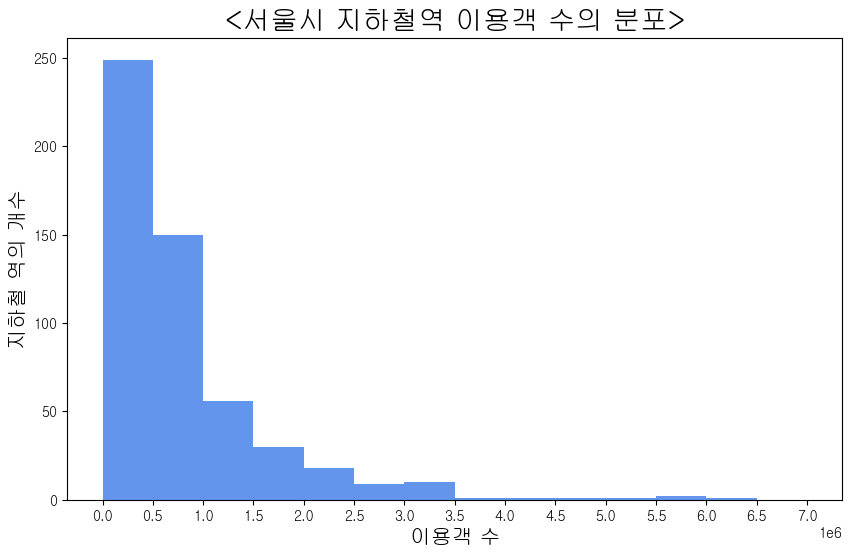

In [105]:
def passenger_num(station):
    df = stations.get_group(station).set_index(['사용월', '호선명', '역ID', '지하철역'])
    series = df.astype(int).sum(axis = 1)
    return series.sum()

num_list = []
def main():
    for station in passengerDF['지하철역'].unique():
        num_list.append(passenger_num(station))
    index = passengerDF['지하철역'].unique()
    data = num_list
    num_series = pd.Series(index = index, data = data)
    print(f'1. 각 지하철 역별 이용객수의 평균 : {round(num_series.mean())}명')
    print(f'2. 각 지하철 역별 이용객수의 표준편차 : {round(num_series.std())}')
    print(f'3. 이용객 수가 가장 많은 역의 이름 : {num_series.idxmax()}')
    print(f'4. 이용객 수가 가장 적은 역의 이름 : {num_series.idxmin()}')
    print(f'5. 가장 많은 이용객이 있는 역의 이용객 수 : {num_series[num_series.idxmax()]}명')
    print(f'6. 가장 적은 이용객이 있는 역의 이용객 수 : {num_series[num_series.idxmin()]}명')

    plt.figure(figsize = (10, 6))
    plt.hist(num_list, bins = 14, range = (0, 7000000), color = 'cornflowerblue')
    plt.title('<서울시 지하철역 이용객 수의 분포>', size = 20)
    plt.xlabel('이용객 수', size = 15)
    plt.ylabel('지하철 역의 개수', size = 15)
    plt.xticks(np.linspace(0, 7000000, 15))
    plt.show()
    
main()